In [1]:
%load_ext autoreload
%autoreload 2

import pymc as pm
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import arviz as az
from matplotlib import pyplot as plt

import sys
sys.path.append('..')
from pfas_prep import PFAS
from PyPKMC import PyPKMC
import register_pfas_data as rpd

In [2]:
chemical = 'PFHxS'
pfas_db = '../PFAS.db'
pfas_tmp = PFAS(pfas_db, pfas_file = '../auxiliary/pfas_master.csv', route_only = 'gavage')#, hero_only=1289834) # 

# Investigate changing population mean for clearance and volume of distribution

Fit a 2-compartment model for PFNA using increasingly broad priors

In [3]:
pfas_male_data = pfas_tmp.get_processed_data(chemical=chemical, sex='Female', species='rat')

Hero ID available:  [1289834 3749289 4239569 5387170]
dropping duplicated column
Hero ID used:  [3749289 4239569 5387170]


In [4]:
# Original priors
pfas_male_2cmpt_default = PyPKMC(pfas_male_data, time_label='time_cor', y_obs_label='conc_mean_cor', sd_obs_label='conc_sd_cor',
                         route_label='route_idx', dose_label='dose_mg', BW_label='BW_cor', 
                         study_label='hero_id', dataset_label='dataset_str', indiv_label='aidx', #Rkcd_SD_prior = 0.2,
                         CLC_prior = {'mu': -2.89, 'sd': 2.68}, Vdss_prior = {'mu': -1.5, 'sd': 1.5})
pfas_male_2cmpt_default.sample(model_type='2-compartment', target_accept=0.99, nuts_sampler='numpyro', trace_suffix='default_priors',
                   load_trace=False, tune=10000, draws=5000, likelihood='Lognormal', sample_prior=True, sample_posterior=True)

PFHxS_Female_rat_2cmpt_default_priors
hierarchical model, 2-compartment


Sampling: [conc_indiv, conc_summary, lnCLC_offset, lnR_offset, lnVdss_offset, lnk_abs_offset, lnk_cd_offset, mu_lnCLC, mu_lnR, mu_lnVdss, mu_lnk_abs, mu_lnk_cd, sigma, sigma_lnCLC, sigma_lnR, sigma_lnVdss, sigma_lnk_abs, sigma_lnk_cd]


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

2024-08-19 12:35:49.852713: E external/xla/xla/service/slow_operation_alarm.cc:65] Constant folding an instruction is taking > 1s:

  %reduce.6 = f64[4,5000,132]{2,1,0} reduce(f64[4,5000,1,132]{3,2,1,0} %broadcast.43, f64[] %constant.49), dimensions={2}, to_apply=%region_4.200, metadata={op_name="jit(process_fn)/jit(main)/reduce_prod[axes=(2,)]" source_file="/data/tzurlind/tmp/tmpdhykv544" source_line=167}

This isn't necessarily a bug; constant-folding is inherently a trade-off between compilation time and speed at runtime. XLA has some guards that attempt to keep constant folding from taking too long, but fundamentally you'll always be able to come up with an input program that takes a long time.

If you'd like to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
2024-08-19 12:35:58.180984: E external/xla/xla/service/slow_operation_alarm.cc:133] The operation took 9.328344214s
Constant folding an instruction is taking > 1s:

  %reduce.6 = f64[4,5000

Output()

Combining likelihoods...


/data/tzurlind/pkgs/miniforge3/lib/python3.12/site-packages/arviz/stats/stats.py:789: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Checking metrics...
Pass all metrics = True
Assign pareto...


In [11]:
pfas_male_2cmpt_default.get_pk_stats(vol_units='ml')

,mean,sd,hdi_5%,hdi_95%
CLC [pop],85.61000,16.06000,61.24000,110.04000
Vc [pop],0.20572,0.02623,0.16351,0.24568
Vdss [pop],222.34000,27.68000,176.88000,263.81000
abs_halft [pop],0.01075,0.00173,0.00793,0.01353
halft [pop],1.85946,0.40961,1.20585,2.48439
halft_alpha [pop],0.92839,0.39882,0.34806,1.58165
halft_beta [pop],2.40836,2.58165,1.31688,2.99730


In [5]:
# Broad population mean priors for clearance and Vdss
pfas_male_2cmpt_broad = PyPKMC(pfas_male_data, time_label='time_cor', y_obs_label='conc_mean_cor', sd_obs_label='conc_sd_cor',
                         route_label='route_idx', dose_label='dose_mg', BW_label='BW_cor', 
                         study_label='hero_id', dataset_label='dataset_str', indiv_label='aidx', #Rkcd_SD_prior = 0.2,
                         CLC_prior = {'mu': 0, 'sd': 5}, Vdss_prior = {'mu': 0, 'sd':5})
pfas_male_2cmpt_broad.sample(model_type='2-compartment', target_accept=0.99, nuts_sampler='numpyro', trace_suffix='broad_mean_priors',
                   load_trace=False, tune=10000, draws=5000, likelihood='Lognormal', sample_prior=True, sample_posterior=True)

PFHxS_Female_rat_2cmpt_broad_mean_priors
hierarchical model, 2-compartment


Sampling: [conc_indiv, conc_summary, lnCLC_offset, lnR_offset, lnVdss_offset, lnk_abs_offset, lnk_cd_offset, mu_lnCLC, mu_lnR, mu_lnVdss, mu_lnk_abs, mu_lnk_cd, sigma, sigma_lnCLC, sigma_lnR, sigma_lnVdss, sigma_lnk_abs, sigma_lnk_cd]


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

Sampling: [conc_indiv, conc_summary]


Output()

Combining likelihoods...


/data/tzurlind/pkgs/miniforge3/lib/python3.12/site-packages/arviz/stats/stats.py:789: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Checking metrics...
Pass all metrics = True
Assign pareto...


In [12]:
pfas_male_2cmpt_broad.get_pk_stats(vol_units='ml')

,mean,sd,hdi_5%,hdi_95%
CLC [pop],86.04000,16.21000,61.53000,110.54000
Vc [pop],0.20590,0.02653,0.16518,0.24823
Vdss [pop],222.49000,27.95000,178.20000,265.56000
abs_halft [pop],0.01076,0.00174,0.00789,0.01351
halft [pop],1.85122,0.40531,1.18884,2.46781
halft_alpha [pop],0.92978,0.39890,0.29663,1.55349
halft_beta [pop],2.38504,2.27698,1.31456,2.99730


In [6]:
# Broad population variance priors for clearance and Vdss
pfas_male_2cmpt_broad_variance = PyPKMC(pfas_male_data, time_label='time_cor', y_obs_label='conc_mean_cor', sd_obs_label='conc_sd_cor',
                         route_label='route_idx', dose_label='dose_mg', BW_label='BW_cor', 
                         study_label='hero_id', dataset_label='dataset_str', indiv_label='aidx', #Rkcd_SD_prior = 0.2,
                         CLC_prior = {'mu': -2.89, 'sd': 2.68}, Vdss_prior = {'mu': -1.5, 'sd': 1.5}, pop_SD_prior=3)
pfas_male_2cmpt_broad_variance.sample(model_type='2-compartment', target_accept=0.99, nuts_sampler='numpyro', trace_suffix='broad_variance_priors',
                   load_trace=False, tune=10000, draws=5000, likelihood='Lognormal', sample_prior=True, sample_posterior=True)

PFHxS_Female_rat_2cmpt_broad_variance_priors
hierarchical model, 2-compartment


Sampling: [conc_indiv, conc_summary, lnCLC_offset, lnR_offset, lnVdss_offset, lnk_abs_offset, lnk_cd_offset, mu_lnCLC, mu_lnR, mu_lnVdss, mu_lnk_abs, mu_lnk_cd, sigma, sigma_lnCLC, sigma_lnR, sigma_lnVdss, sigma_lnk_abs, sigma_lnk_cd]


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

Sampling: [conc_indiv, conc_summary]


Output()

Combining likelihoods...


/data/tzurlind/pkgs/miniforge3/lib/python3.12/site-packages/arviz/stats/stats.py:789: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Checking metrics...
Pass all metrics = True
Assign pareto...


In [13]:
pfas_male_2cmpt_broad_variance.get_pk_stats(vol_units='ml')

,mean,sd,hdi_5%,hdi_95%
CLC [pop],86.29000,22.37000,56.34000,114.17000
Vc [pop],0.20568,0.02925,0.15954,0.24993
Vdss [pop],222.40000,31.08000,173.74000,268.94000
abs_halft [pop],0.01075,0.00171,0.00801,0.01362
halft [pop],1.87792,0.51267,1.11391,2.59384
halft_alpha [pop],0.92373,0.40881,0.30623,1.53174
halft_beta [pop],2.45433,2.55566,1.19201,3.12328


# Investigate PK parameters

Investigate the 1% to 99% HDI for each prior assumption. Horizontal dashed lines represent the 95% credible intervals.

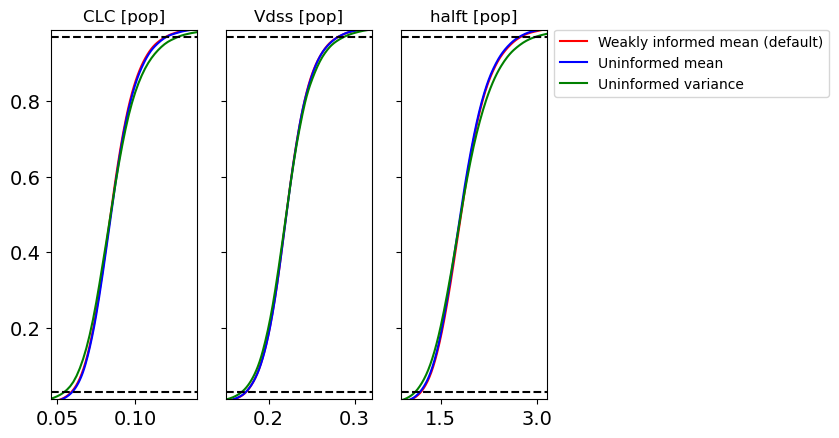

In [8]:
fig, ax = plt.subplots(1,3, sharey=True)
var_names = ['CLC [pop]', 'Vdss [pop]', 'halft [pop]']
for i, var_name in enumerate(var_names):
    az.plot_dist(pfas_male_2cmpt_default._trace.posterior[var_name], cumulative=True, color='red', label='Weakly informed mean (default)', ax=ax[i])
    az.plot_dist(pfas_male_2cmpt_broad._trace.posterior[var_name], cumulative=True, color='blue', label='Uninformed mean', ax=ax[i])
    az.plot_dist(pfas_male_2cmpt_broad_variance._trace.posterior[var_name], cumulative=True, color='green', label='Uninformed variance', ax=ax[i])
    hdi = az.hdi(pfas_male_2cmpt_default._trace.posterior[var_name], hdi_prob=0.99)[var_name]
    ax[i].set_title(var_name)
    ax[i].set_xlim(hdi.values)
    ax[i].set_ylim([0.01, 0.99])
    ax[i].axhline(0.03, color='black', linestyle='--')
    ax[i].axhline(0.97, color='black', linestyle='--')
    ax[i].get_legend().remove()
    ax[i].xaxis.set_major_locator(plt.MaxNLocator(2))
    #ax[i].set_xticklabels(ax[i].get_xticks(), fontsize=8)
ax[-1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
#fig.tight_layout()

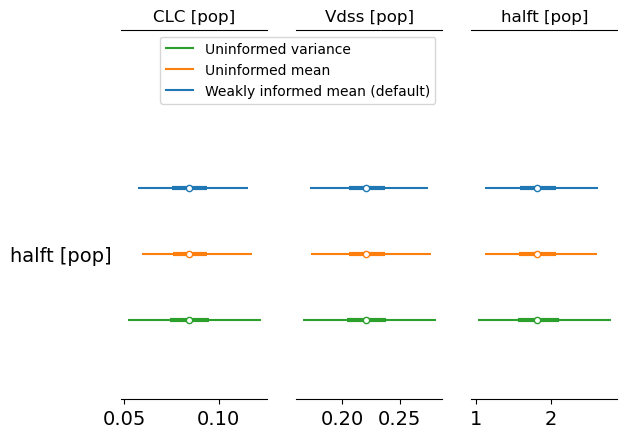

In [9]:
fig, ax = plt.subplots(1,3, sharey=True)
var_names = ['CLC [pop]', 'Vdss [pop]', 'halft [pop]']
for i, var_name in enumerate(var_names):
    az.plot_forest([pfas_male_2cmpt_default._trace.posterior[var_name],
                    pfas_male_2cmpt_broad._trace.posterior[var_name],
                    pfas_male_2cmpt_broad_variance._trace.posterior[var_name]],
                   model_names = ['Weakly informed mean (default)', 'Uninformed mean', 'Uninformed variance'],
                   kind='forestplot', ax=ax[i], combined=True)
    ax[i].set_title(var_name)
    if i != 1:
        ax[i].get_legend().remove()
#ax[-1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)